# Predicting customer churn (attrition)

## By: Raphael Rivers

# Exploratory Data Analysis (EDA)

In [1]:
# Import all modules and read in dataset
from modules import*

### Essential Data Exploration Activities

I will begin by showing the number of rows and columns in the dataset. And explore the data types, check if there are any missing values in each column and how many. And evaluate the number of unique valeus for both categorical and continous variables. Perform summary statistics and visualize the distribution in the dataset. 

In [2]:
# Show dataset info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   object 
 3   international_plan             5000 non-null   object 
 4   voice_mail_plan                5000 non-null   object 
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes            5000 non-null   f

In [3]:
churn_df.shape

(5000, 20)

The dataset contains 5000 rows and 20 columns.

The input variable(s), or features, consist of 19 columns shown below that highlight customer characteristics. These columns contain data about customer location, usage, plans, and interactions, likely influencing whether a customer will churn. Each feature can provide valuable information to the predictive model, allowing it to learn patterns associated with churn.

Input variables include:
- `state`: State the customer is located in
- `account_length`: How long the customer has purchased from the company
- `area_code`: Area code associated with the service center
- `international_plan`: Does the customer have an international plan?
- `voice_mail_plan`: Does the customer have a voicemail plan?
- `number_vmail_messages`: Number of voicemail messages
- `total_day_minutes`: Total minutes spent during the day
- `total_day_calls`: Total number of calls made during the day
- `total_day_charge`: Total charge applied to the customer during the day
- `total_eve_minutes`: Total minutes spent during the evening
- `total_eve_calls`: Total number of calls made during the evening
- `total_eve_charge`: Total charge applied to the customer during the evening
- `total_night_minutes`: Total minutes spent during the night
- `total_night_calls`: Total number of calls made during the night
- `total_night_charge`: Total charge applied to the customer during the night
- `total_intl_minutes`: Total minutes spent on international calls
- `total_intl_calls`: Total number of international calls
- `total_intl_charge`: Total charge applied to the customer for international calls
- `number_customer_service_calls`: Number of times the customer called the customer service center

In [4]:
# Check the number of missing values per variable. 
churn_df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

There are no missing values in the dataset for any variable.

In [5]:
# Display the number of unique values per variable
churn_df.nunique(dropna=False)

state                              51
account_length                    218
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              48
total_day_minutes                1961
total_day_calls                   123
total_day_charge                 1961
total_eve_minutes                1879
total_eve_calls                   126
total_eve_charge                 1659
total_night_minutes              1853
total_night_calls                 131
total_night_charge               1028
total_intl_minutes                170
total_intl_calls                   21
total_intl_charge                 170
number_customer_service_calls      10
churn                               2
dtype: int64

### EDA - Visualization

### Count and Distribution of Categorical Variables 
In the dataset, we have object types and not categorical variables, including `area_code`, `international_plan`, `voice_mail_plan`, `state`, and `churn` which is the output variable. Before converting these variables to categorical let's their unique values.


In [6]:
# Display the counts for area_code
churn_df.area_code.value_counts()

area_code
area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: count, dtype: int64

In [7]:
# Display the counts for international_plan
churn_df.international_plan.value_counts()

international_plan
no     4527
yes     473
Name: count, dtype: int64

In [8]:
# Display the counts for voice_mail_plan
churn_df.voice_mail_plan.value_counts()

voice_mail_plan
no     3677
yes    1323
Name: count, dtype: int64

In [9]:
# Show counts for churn 
churn_df.churn.value_counts()

churn
no     4293
yes     707
Name: count, dtype: int64

In [10]:
# Create df subset for visualization
df_viz = churn_df.copy()

categorical_cols = df_viz.select_dtypes('object').columns

### Visulize categorical variables count

Let's visualize the marginal distribution of the categorical variables usiing a for loop

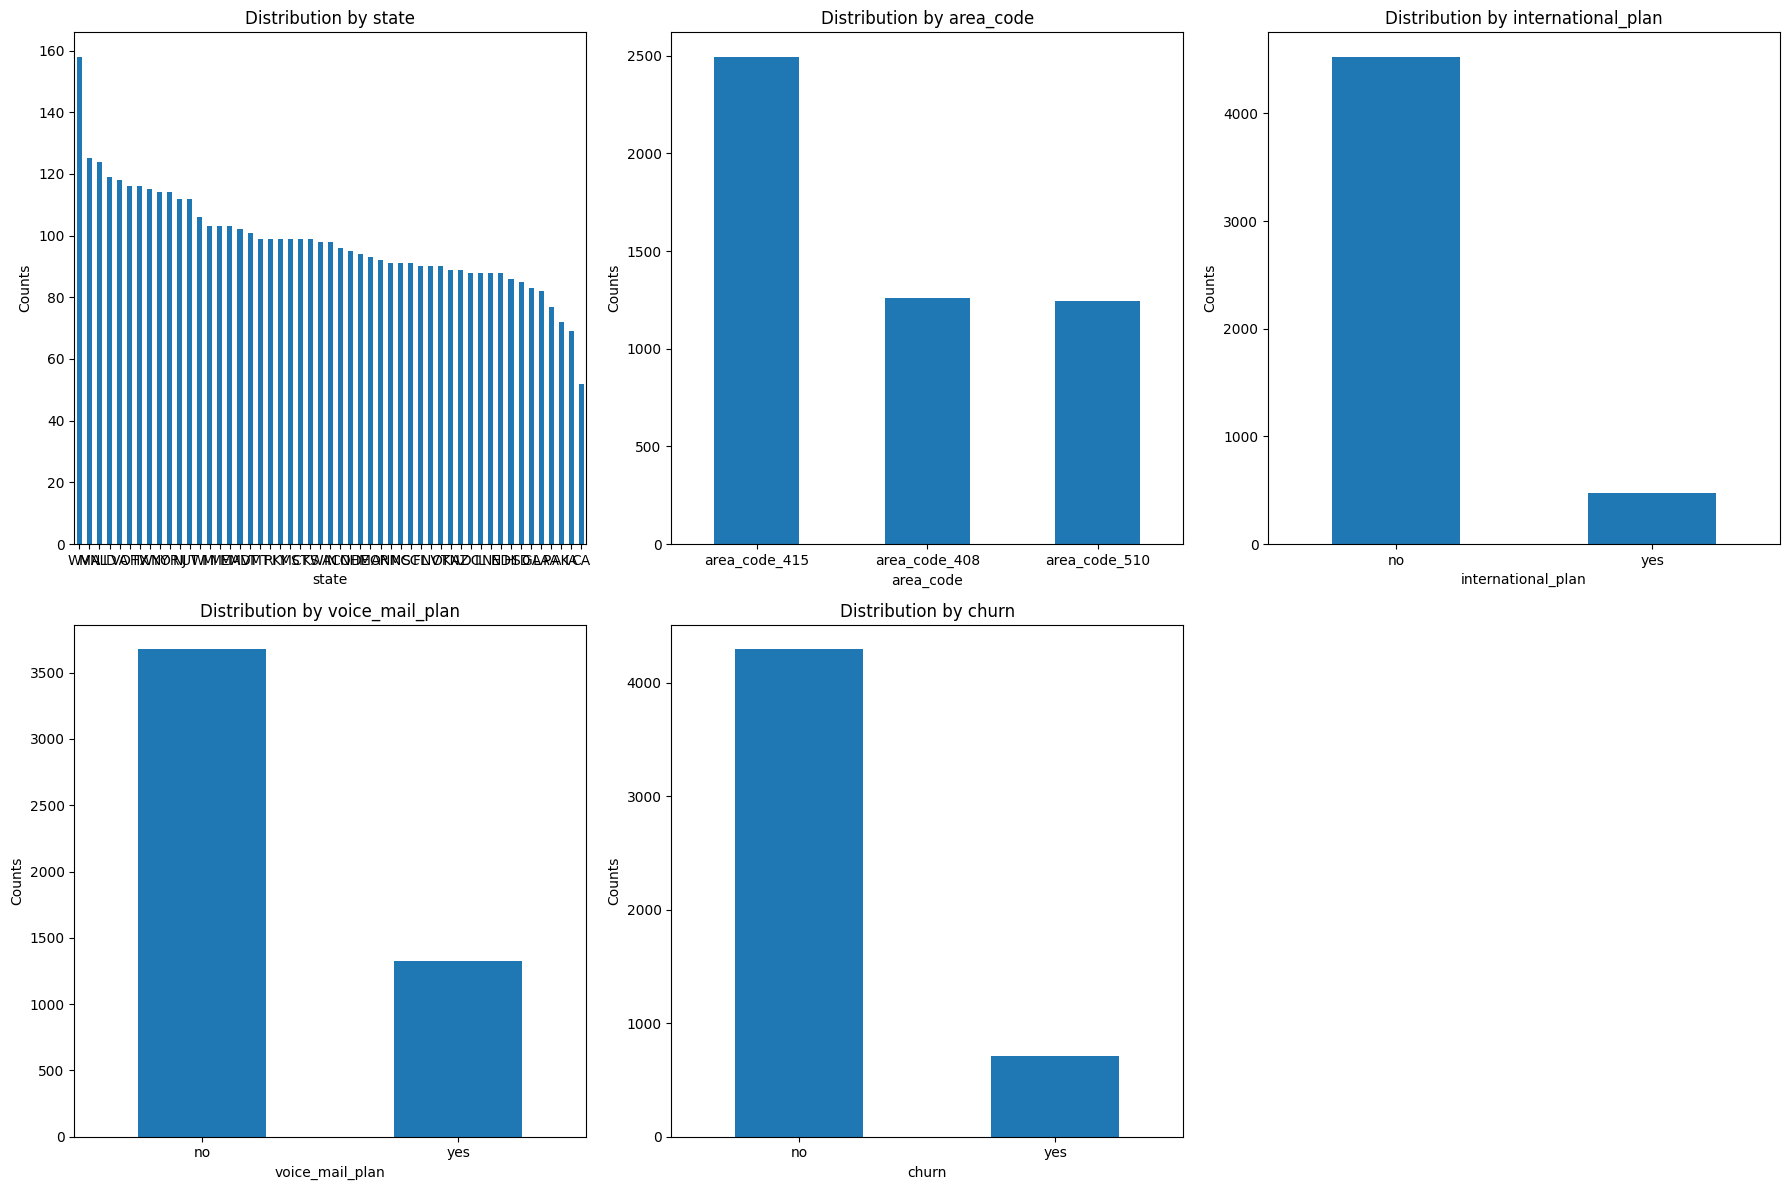

In [11]:
# Define the number of rows and columns
nrows = 2
ncols = 3

# Create a figure with specified dimensions
plt.figure(figsize=(18, 12))  

# Iterate over categorical columns and plot
for i, col in enumerate(categorical_cols[:nrows * ncols]):
    plt.subplot(nrows, ncols, i + 1)  # Position the subplot
    df_viz[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.xticks(rotation=360)  # Rotate x-axis labels if needed

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

The dataset shows a balanced distribution of area_code with each code having roughly a third of the entries. The majority of customers do not have an `international_plan` (no) or a `voice_mail_plan` (no).

### Distributions of continuous variables
Let's see how continuous variable values are spread out. However, before performing visualization, let's identify continuous variables and assign them to a list.

In [12]:
# Identify and reshape continous variables
numeric_cols = df_viz.select_dtypes(include='number').columns.tolist()

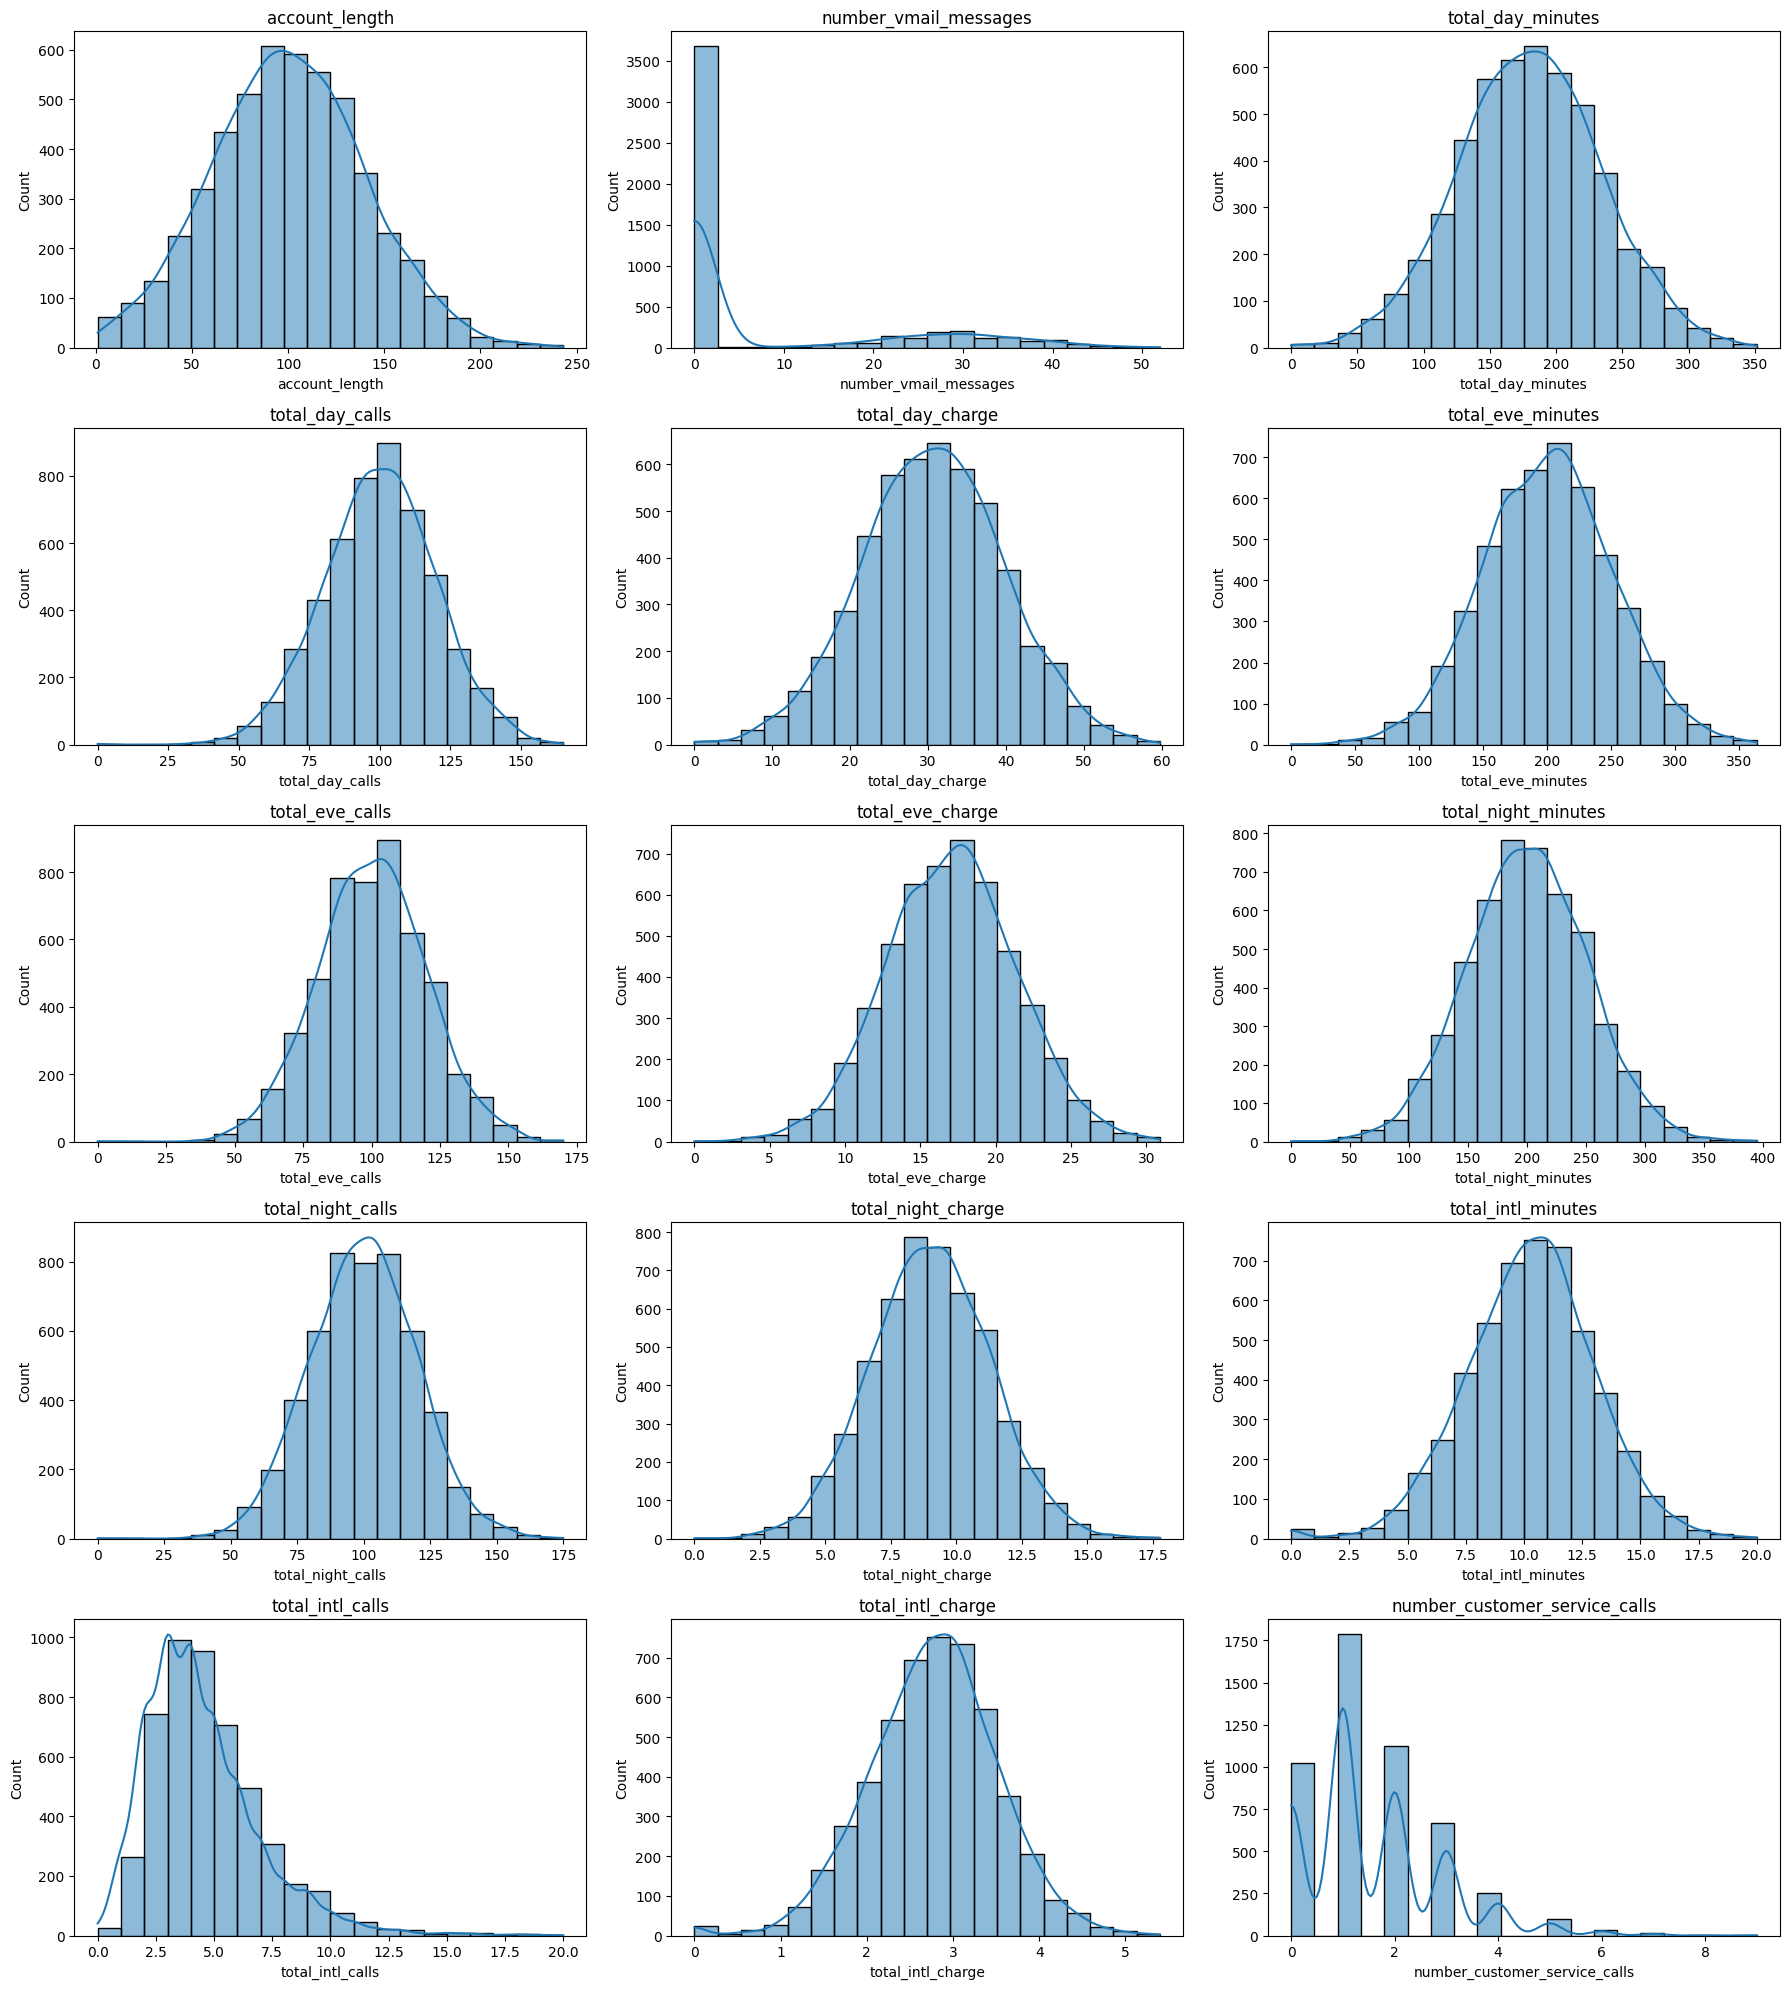

In [13]:
# Distributions of continuous variables 
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))

for i, col in enumerate(numeric_cols):
    # calculates the position of each subplot in the grid, 3 rows and 3 index
    ax = axes[i // 3, i % 3]  

    # Set number of bins and overlay kde
    sns.histplot(df_viz[col], bins=20, kde=True, ax=ax, edgecolor='k') 
    
    ax.set_title(col)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

The distributions of continuous variables show varied usage patterns among customers, with some variables like `total_day_minutes` and `total_day_charge closely correlated`. 

Meanwhile, the values within the numeric columns are spread out, except for `number_customer_service_calls`, `number_vmail_messages`, and `total_intl_calls`, which are skewed to the right, meaning that the majority of the data values lie to the left of the mean. Variables skewed to the right suggest that most customer calls have lower values for these metrics, with a few customer calls having significantly higher values. 

- `number_vmail_messages` shows a large number of observations concentrated near zero, with fewer observations as the number of voicemail messages increases. This means most customers have a low number of voicemail messages, but a few have high number.
- `number_customer_service_calls` shows a significant concentration of data points at lower values, with fewer observations as the number of customer service calls increases. Indicating that most customers make few customer service calls, but a few customers make many calls to customer service.
- `total_intl_calls` shows that most values are low with a small number of higher values, indicating that most customers make fewer international calls, but some make a lot of them.

### Relationships between continuous variables
I will use scatter plots and correlation heatmaps to visualize these relationships.

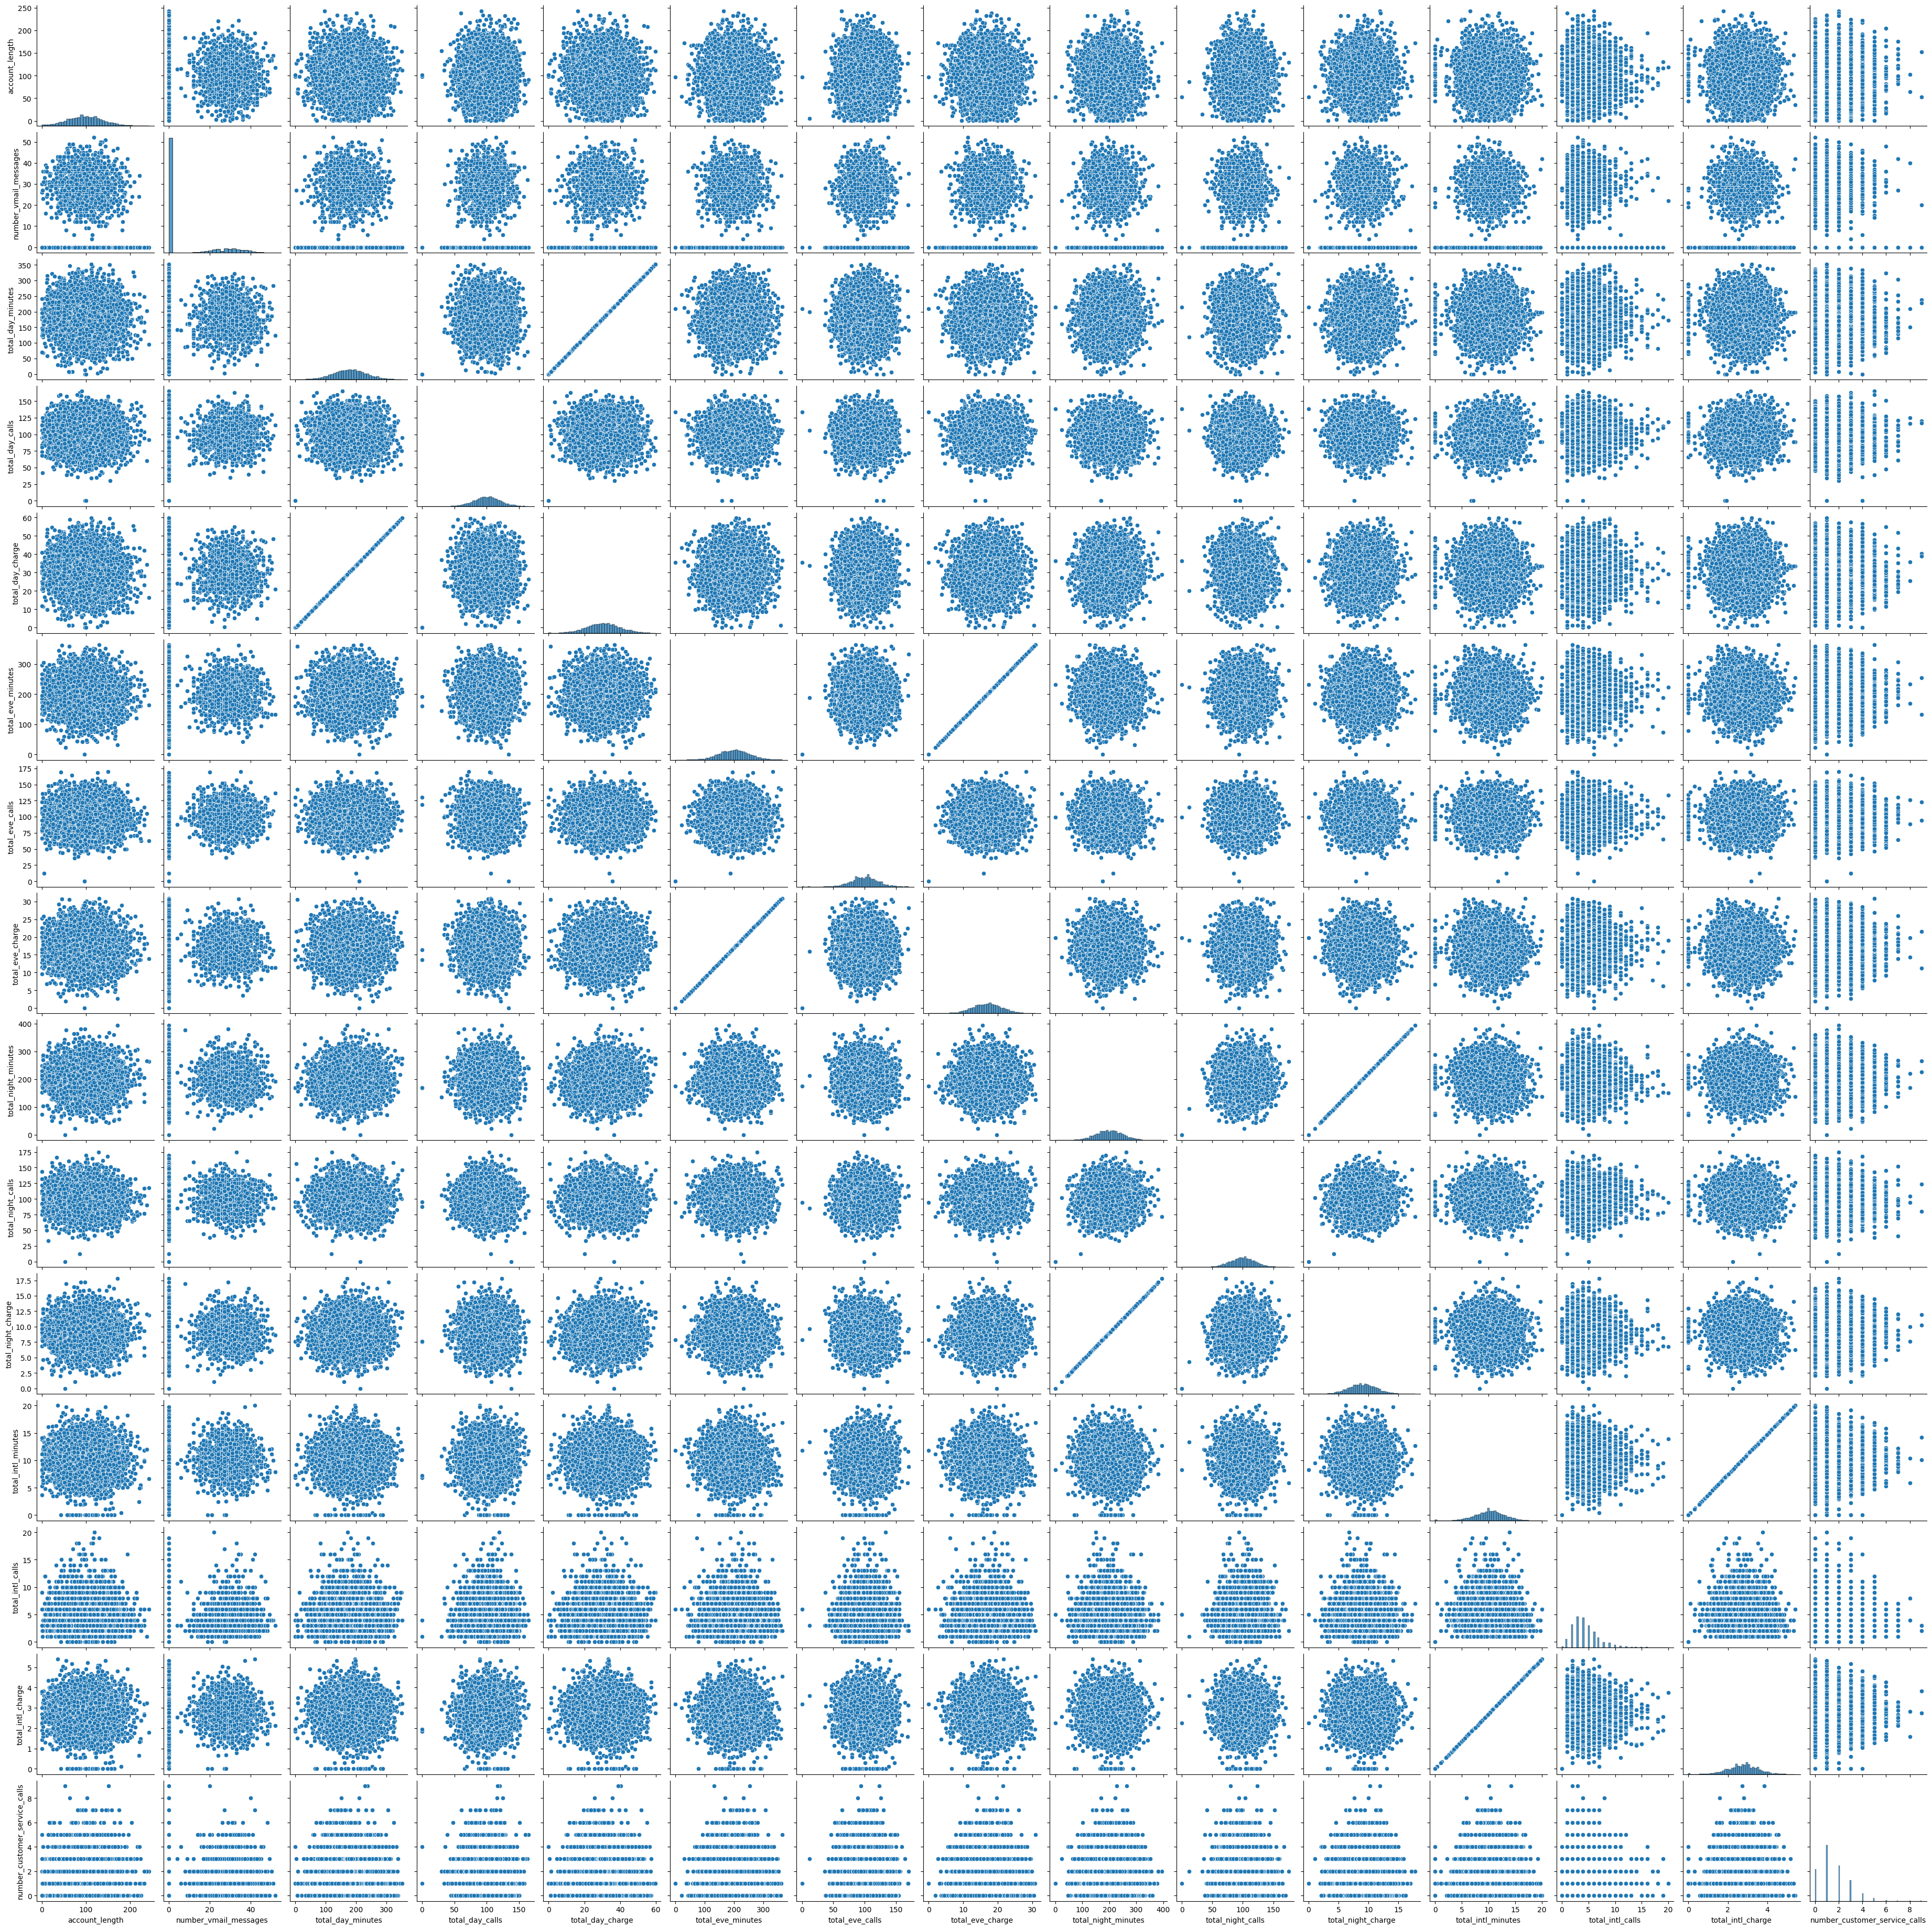

In [14]:
# Continous input relationship
sns.pairplot(data= df_viz[numeric_cols])
plt.show()

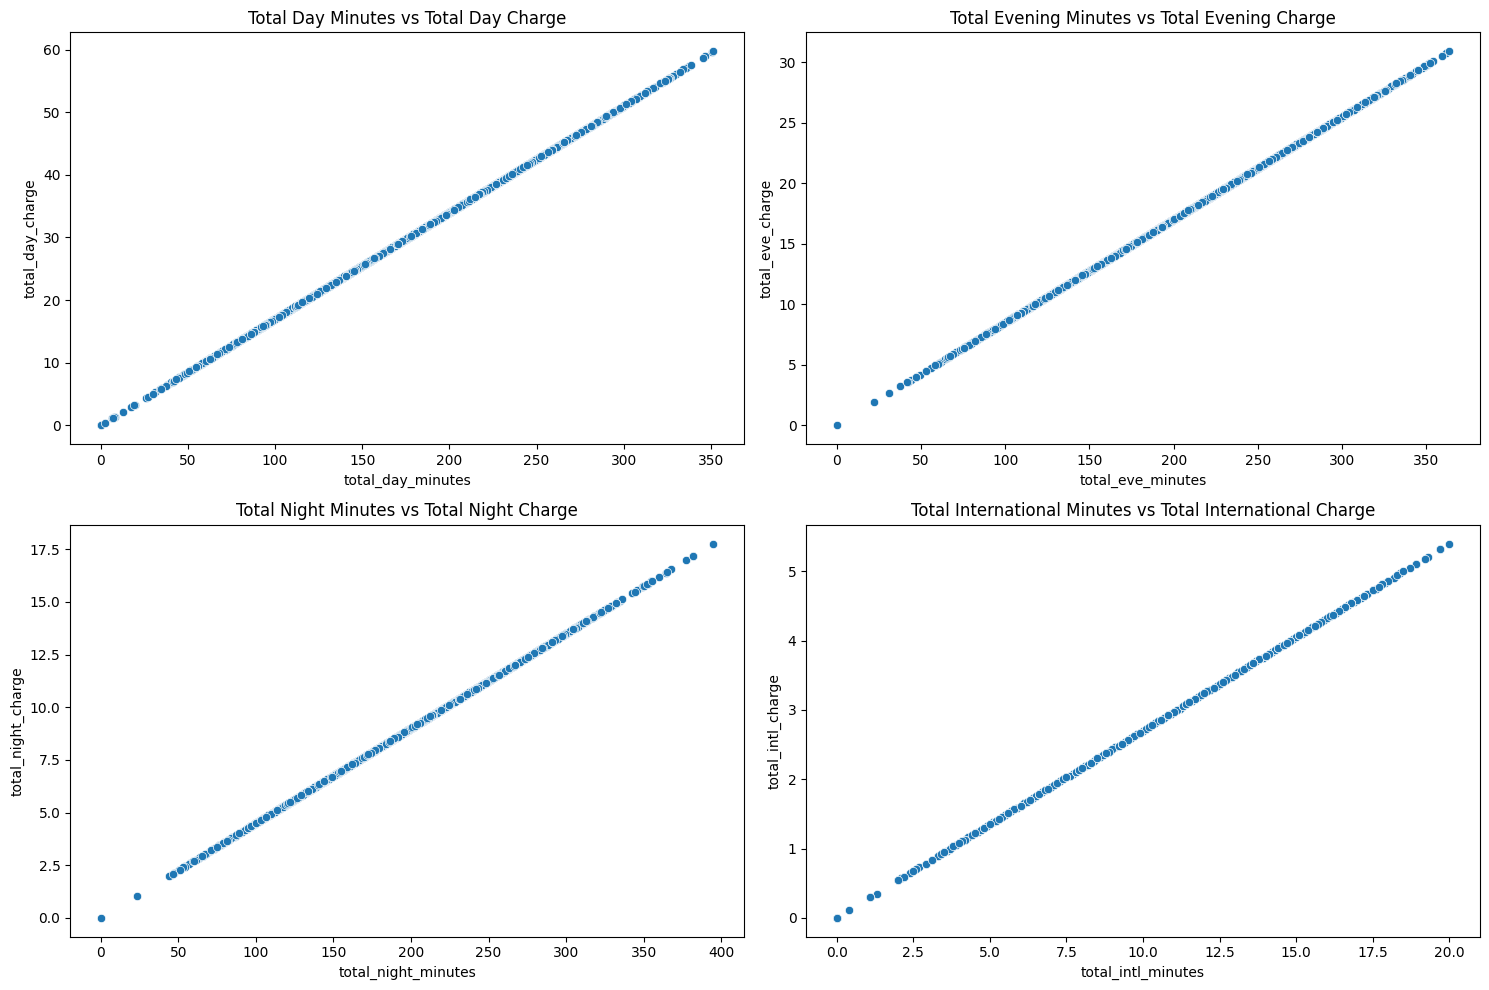

In [15]:
# Continuous input relationship 
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df_viz, x='total_day_minutes', y='total_day_charge')
plt.title('Total Day Minutes vs Total Day Charge')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df_viz, x='total_eve_minutes', y='total_eve_charge')
plt.title('Total Evening Minutes vs Total Evening Charge')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df_viz, x='total_night_minutes', y='total_night_charge')
plt.title('Total Night Minutes vs Total Night Charge')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_viz, x='total_intl_minutes', y='total_intl_charge')
plt.title('Total International Minutes vs Total International Charge')

plt.tight_layout()
plt.show()


The scatter plots shows a linear relationships between minutes and charges in day, evening, night, and international categories. This indicates a strong linear relationship between minute usage and corresponding charges across different time periods (day, evening, night, international).

### Categorical-to-categorical relationships (COMBINATIONS)
Using a cross tabulation I will explore the relationship between categorical variables, specifically focusing on the relationship between international_plan, voice_mail_plan, and churn. After I will examine the individual realtionship using bar charts.

In [16]:
# Setting up Categorical-to-categorical relationships using crosstab
crosstab_ip_churn = pd.crosstab(df_viz['international_plan'], df_viz['churn'])
crosstab_vm_churn = pd.crosstab(df_viz['voice_mail_plan'], df_viz['churn'])

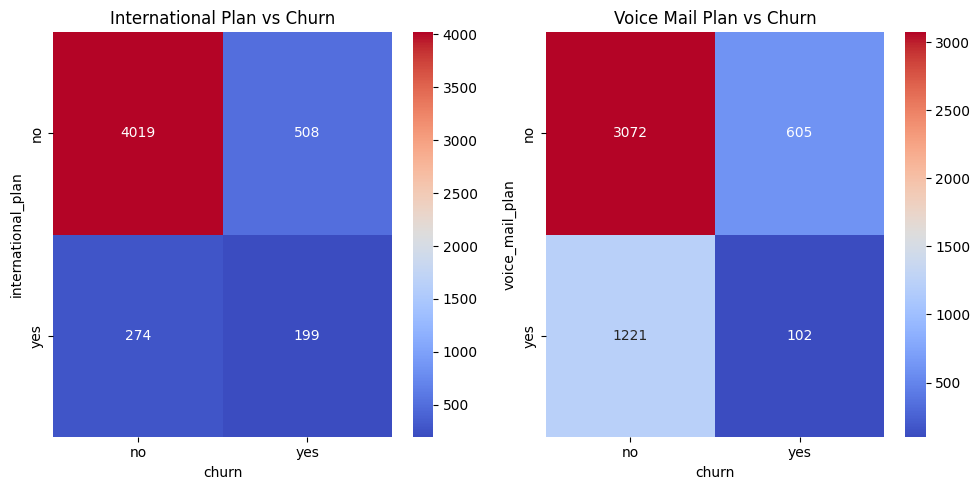

In [17]:
# Visualizing crosstab results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(crosstab_ip_churn, annot=True, fmt="d", cmap="coolwarm")
plt.title('International Plan vs Churn')

plt.subplot(1, 2, 2)
sns.heatmap(crosstab_vm_churn, annot=True, fmt="d", cmap="coolwarm")
plt.title('Voice Mail Plan vs Churn')

plt.tight_layout()
plt.show()

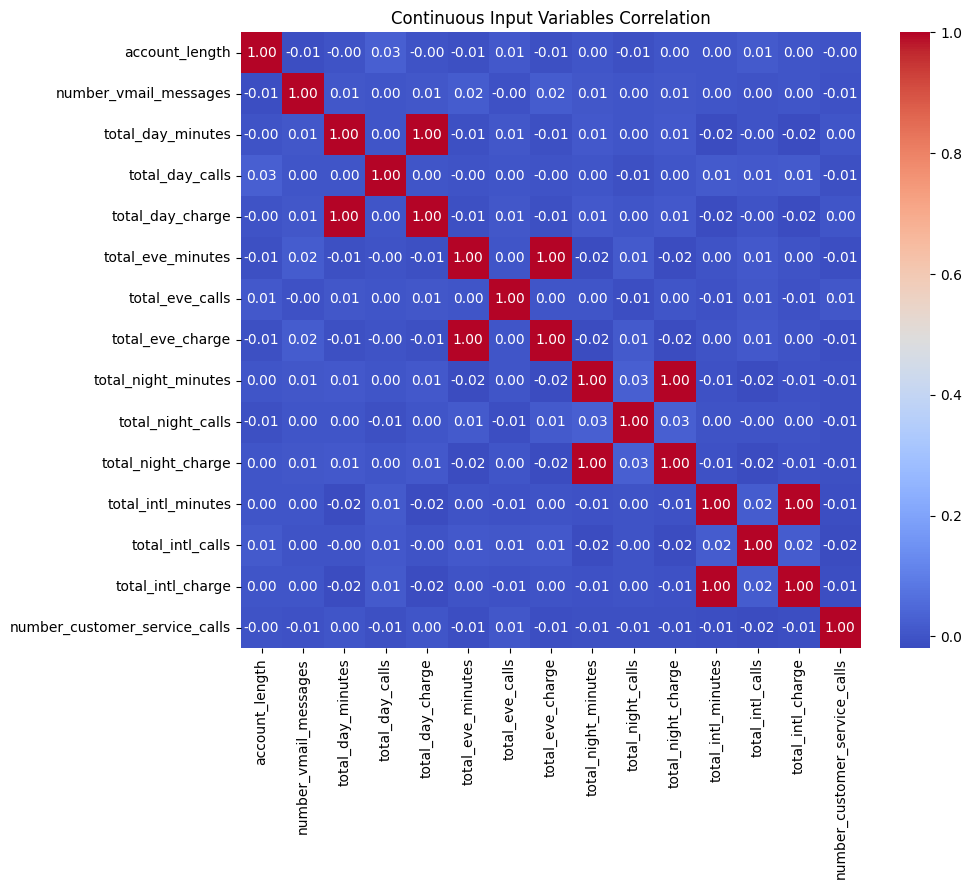

In [18]:
# Correlation between continuous input 
plt.figure(figsize=(10, 8))
sns.heatmap(df_viz[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Continuous Input Variables Correlation')
plt.show()

The correlation plot indicates strong correlations between minutes and their corresponding charges (e.g., total_day_minutes and total_day_charge). This correlation supports the linear relationship in the scatter plots, which is expected as call charges are directly derived from usage. However, examining how the relationship changes with the response variable across the access groups will provide additional insight into the influencing factor.

### Relationship Changes Across Groups
Let's examine how relationships with the response variable `churn` change across different groups. Let's examine the `international_plan` and `voice_mail_plan` to see if these plans affect the relationship between `total_day_minutes` and `churn`.

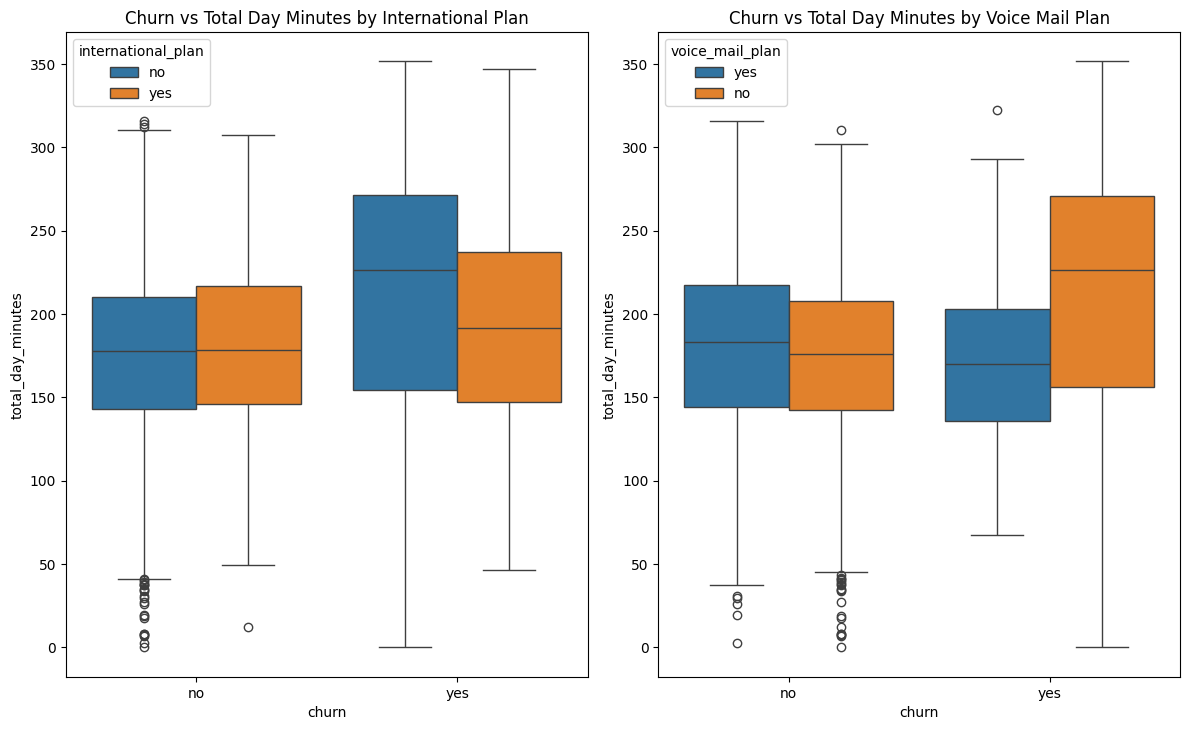

In [19]:
# Relationship changes across groups using box plot
plt.figure(figsize=(12, 14))

plt.subplot(2, 2, 1)
sns.boxplot(data=df_viz, x='churn', y='total_day_minutes', hue='international_plan')
plt.title('Churn vs Total Day Minutes by International Plan')

plt.subplot(2, 2, 2)
sns.boxplot(data=df_viz, x='churn', y='total_day_minutes', hue='voice_mail_plan')
plt.title('Churn vs Total Day Minutes by Voice Mail Plan')

plt.tight_layout()
plt.show()


The box plots indicate that customers with `international_plans` or `voice_mail_plans` show varied usage patterns, which might be an influencing factor in customer churn prediction. This reveals how the presence of an `international_plan` or `voice_mail_plan` affects the relationship between `total_day_minutes` and `churn`, lending credence to the assumption that customers with an international plan or a voice mail plan have different usage patterns compared to those without these plans, especially in relation to the output variable `churn`. 
